In [5]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [42]:
import numpy as np
import pandas as pd
import datetime
import scipy.stats as stats
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import statsmodels.api as sm

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

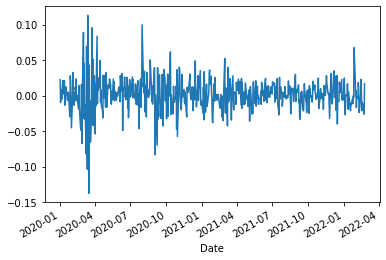

In [43]:
apple = yf.download("AAPL", start = "2020-1-1", end = "2022-2-28")
St = apple['Adj Close']
initial_price = St[-1]
returns = St.pct_change()
ln_returns = np.log(1+ returns)
log_returns = ln_returns[1:543]
log_returns.plot()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 544 entries, 2019-12-31 to 2022-02-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       544 non-null    float64
 1   High       544 non-null    float64
 2   Low        544 non-null    float64
 3   Close      544 non-null    float64
 4   Adj Close  544 non-null    float64
 5   Volume     544 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 29.8 KB


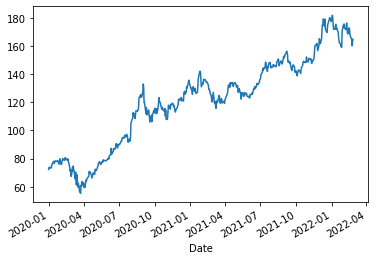

In [44]:
St.plot()
apple.info()

In [45]:
M = 100000
N = 126
nudt = 0 # assuming that only movement of the stock comes from innovation terms
volsdt = log_returns.std()
#avg = log_returns.mean() the assumption of 0 was made because the mean here returns value close to 0
print(avg, volsdt)
lnS = np.log(initial_price)

0.0014982985736132677 0.02331875607679788


In [46]:
#Random Number Generation
np.random.seed(100)
Z = np.random.normal(size=(N, M))


In [47]:

delta_lnSt = nudt + volsdt*Z
lnSt = lnS + np.cumsum(delta_lnSt, axis=0)
lnSt = np.concatenate( (np.full(shape=(1, M), fill_value=lnS), lnSt ) )
ST = np.exp(lnSt)


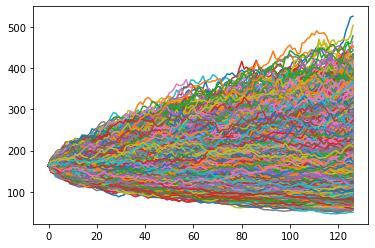

In [48]:
plt.plot(ST)
plt.show()

170.5123457750404 45.362122217478216 100000
525.3541707281407 50.82017973909116
0.8013713412465492 1.1357686215026312


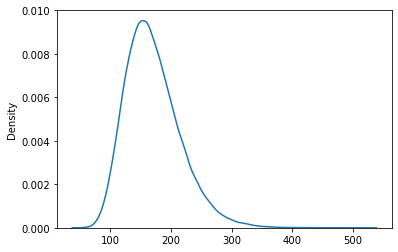

In [58]:
final_day = ST[-1]
sns.kdeplot(final_day)
mean0 = final_day.mean()
se0 = final_day.std()
print(mean0,se0, len(final_day))

print(final_day.max(), final_day.min())
skew0 = stats.skew(final_day)
kurtosis0 = stats.kurtosis(final_day)
print(skew0, kurtosis0)



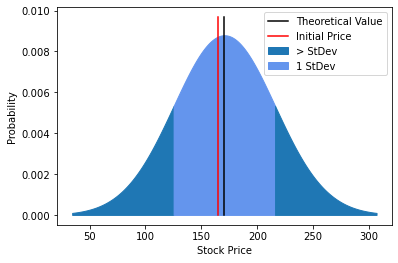

In [52]:
x1 = np.linspace(mean0-3*se0, mean0-1*se0, 100)
x2 = np.linspace(mean0-1*se0,mean0+1*se0,100)
x3 = np.linspace(mean0+1*se0,mean0+3*se0,100)

s1 = stats.norm.pdf(x1, mean0, se0) 
s2 = stats.norm.pdf(x2, mean0, se0)
s3 = stats.norm.pdf(x3, mean0, se0)

plt.fill_between(x1, s1, color='tab:blue',label='> StDev') 
plt.fill_between(x2, s2, color='cornflowerblue',label='1 StDev') 
plt.fill_between(x3, s3, color='tab:blue') 

plt.plot([mean0,mean0],[0, max(s2)*1.1], 'k', label='Theoretical Value') #black line plots the theoretical value
plt.plot([initial_price,initial_price],[0, max(s2)*1.1], 'r', label='Initial Price') # red line plots the market price

plt.ylabel("Probability") # show the y- axis label
plt.xlabel("Stock Price") # show the x- axis label
plt.legend() # show the legend
plt.show() #show the plot


In [54]:
import numpy as np 
from scipy.stats import t

x =final_day

m = x.mean() 
s = x.std() 
dof = len(x)-1 
confidence = 0.95

t_crit = np.abs(t.ppf((1-confidence)/2,dof))

(m-s*t_crit/np.sqrt(len(x)), m+s*t_crit/np.sqrt(len(x))) 


(170.23119019194726, 170.7935013581335)

Now, Let's observe the effect of decreased number of simulations.

In [55]:
Z.shape
Z1 = Z[:, :10000]
Z1.shape
M1 = 10000

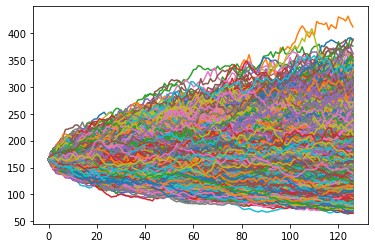

In [56]:

delta_lnSt1 = nudt + volsdt*Z1
lnSt1 = lnS + np.cumsum(delta_lnSt1, axis=0)
lnSt1 = np.concatenate( (np.full(shape=(1, M1), fill_value=lnS), lnSt1) )
ST1 = np.exp(lnSt1)
plt.plot(ST1)
plt.show()
#18 second

170.50998738584985 45.36971438344841 10000
0.7535059888968931 0.8276608743872926


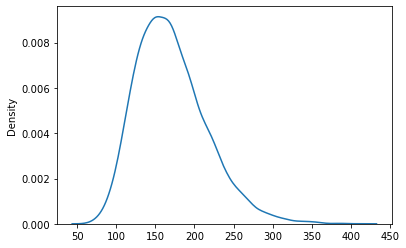

In [59]:
final_day1 = ST1[-1]
sns.kdeplot(final_day1)
mean01 = final_day1.mean()
se01 = final_day1.std()
print(mean01,se01, len(final_day1))
skew1 = stats.skew(final_day1)
kurtosis1 = stats.kurtosis(final_day1)
print(skew1, kurtosis1)



In [60]:
print(final_day1.max(), final_day1.min())
x1 =final_day1

m1 = x1.mean() 
s1 = x1.std() 
dof1 = len(x1)-1 
confidence = 0.95

t_crit1 = np.abs(t.ppf((1-confidence)/2,dof1))

(m1-s1*t_crit1/np.sqrt(len(x1)), m1+s1*t_crit1/np.sqrt(len(x1))) 

411.37843450879893 65.0275769918223


(169.6206496712041, 171.39932510049562)

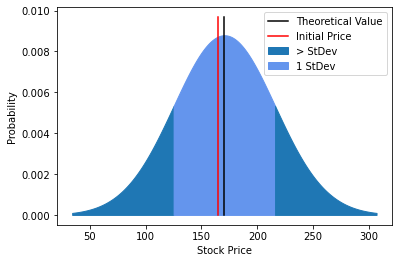

In [61]:
x11 = np.linspace(mean01-3*se01, mean01-1*se01, 100)
x21 = np.linspace(mean01-1*se01,mean01+1*se01,100)
x31 = np.linspace(mean01+1*se01,mean01+3*se01,100)

s11 = stats.norm.pdf(x11, mean01, se01) 
s21 = stats.norm.pdf(x21, mean01, se01)
s31 = stats.norm.pdf(x31, mean01, se01)

plt.fill_between(x11, s11, color='tab:blue',label='> StDev') 
plt.fill_between(x21, s21, color='cornflowerblue',label='1 StDev') 
plt.fill_between(x31, s31, color='tab:blue') 

plt.plot([mean01,mean01],[0, max(s21)*1.1], 'k', label='Theoretical Value') #black line plots the theoretical value
plt.plot([initial_price,initial_price],[0, max(s21)*1.1], 'r', label='Initial Price') # red line plots the market price

plt.ylabel("Probability") # show the y- axis label
plt.xlabel("Stock Price") # show the x- axis label
plt.legend() # show the legend
plt.show() #show the plot

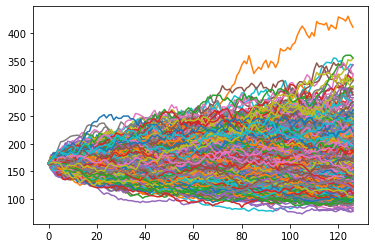

In [67]:
Z11 = Z[:, :1000]
delta_lnSt11 = nudt + volsdt*Z11
lnSt11 = lnS + np.cumsum(delta_lnSt11, axis=0)
lnSt11 = np.concatenate( (np.full(shape=(1, 1000), fill_value=lnS), lnSt11) )
ST11 = np.exp(lnSt11)
plt.plot(ST11)
plt.show()



171.94098816990666 45.84872164258026 1000


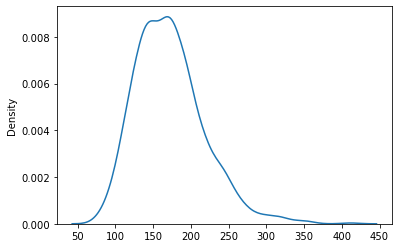

In [69]:
final_day11 = ST11[-1]
sns.kdeplot(final_day11)
mean011 = final_day11.mean()
se011 = final_day11.std()
print(mean011,se011, len(final_day11))


In [70]:

print(final_day11.max(), final_day11.min())
skew11 = stats.skew(final_day11)
kurtosis11 = stats.kurtosis(final_day11)
print(skew11, kurtosis11)


411.37843450879893 77.48874536222088
0.8890569419495068 1.473979662065207


In [71]:

m11 = final_day11.mean() 
s11 = final_day11.std() 
dof11 = len(final_day11)-1 
confidence = 0.95

t_crit11 = np.abs(t.ppf((1-confidence)/2,dof11))

(m11-s11*t_crit11/np.sqrt(len(x11)), m11+s11*t_crit11/np.sqrt(len(x11))) 


(162.9439034279865, 180.93807291182682)

I just showed you the impact of changing the number of simulation in the results of the monte carlo simulation. Let me check the impact of having a different random number generator. Lagged fibonacci generator will generate uniform random number.

<AxesSubplot:ylabel='Density'>

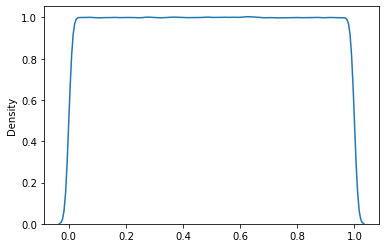

In [72]:
#Lagged Fibonacci Generator For Uniform Random Numbers

# parameter settings
nn   = 18
a    = 1366
b    = 150889
M    = 714025
seed = 123456
n    = 12600000 + 1
yy = []
yy.append(seed)   
i    = 1

# Main computation
while i <= nn:
    yy.append( (a * yy[i - 1] + b) % M)
    i  = i + 1

y = [x / M for x in yy]
i=19

while i <= n + 18:
    zeta = y[i - 12] - y[i - 5]
    if zeta < 0:
        zeta = zeta + 1
    
    y.append(zeta)
    i = i + 1

U3   = y[19:n + 18]
n1  = n - 2
n2  = n - 1

sns.kdeplot(U3) 


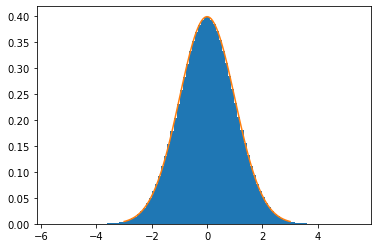

In [73]:
#Box Müller Method _ Youtube channel StatMonteCarlo

import numpy as np
import numpy.random as rd
from scipy import stats
import matplotlib.pyplot as plt

def fcos(theta, E):
  #return [np.cos(theta), np.sin(theta)] * np.sqrt(2*E)
  return np.cos(theta) * np.sqrt(2*E)
  

def BoxMuller(N, mu = 0, sigma = 1 ):
  out = np.zeros(N)
  for j in range(N):
    #theta = rd.uniform(low = 0, high = 2*np.pi, size = 1)
    theta = 2*np.pi * U3[j]
    E = rd.exponential(scale = 1/1, size = 1)
    Y = fcos(theta,E)
    out[j] = mu + Y* sigma
  return out
plt.figure()
Y = BoxMuller(12600000)
plt.hist(Y, bins=100, density=True)
xd=np.linspace(-3,3,100)
plt.plot(xd,stats.norm.pdf(xd))
Norm1 = Y
#for distribution with mean unequal to 0 and sigma unequal to 1, run the phi module
#and use the following code to plot the outline instead for mean 5 and sigma 2
#plt.plot(xd,phi(xd,5,2))

#characteristics function for arbitrary mu and sigma for normal distribution

#def phi(X, mu, sigma):
#  return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))

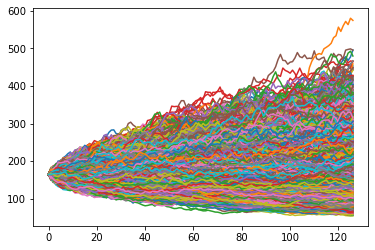

In [74]:
M2 = 100000
N2 = 126
Z2 = np.reshape(Norm1, (N2,M2))
delta_lnSt2 = nudt + volsdt*Z2
lnSt2 = lnS + np.cumsum(delta_lnSt2, axis=0)
lnSt2 = np.concatenate( (np.full(shape=(1, M2), fill_value=lnS), lnSt2 ) )
ST2 = np.exp(lnSt2)
plt.plot(ST2)
plt.show()


170.4225539916962 45.295918969003274
0.8263672992051606 1.2922398805844901


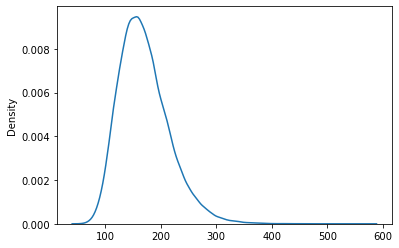

In [75]:
final_day2 = ST2[-1]
sns.kdeplot(final_day2)
mean02 = final_day2.mean()
se02 = final_day2.std()
print(mean02,se02)

skew21 = stats.skew(final_day2)
kurtosis21 = stats.kurtosis(final_day2)
print(skew21, kurtosis21)

In [76]:
print(final_day2.max(), final_day2.min())
x2 =final_day2

m2 = x2.mean() 
s2 = x2.std() 
dof2 = len(x2)-1 
confidence = 0.95

t_crit2 = np.abs(t.ppf((1-confidence)/2,dof2))

(m2-s2*t_crit2/np.sqrt(len(x2)), m2+s2*t_crit2/np.sqrt(len(x2))) 

574.6213024083579 54.253131859899504


(170.14180873801487, 170.7032992453775)

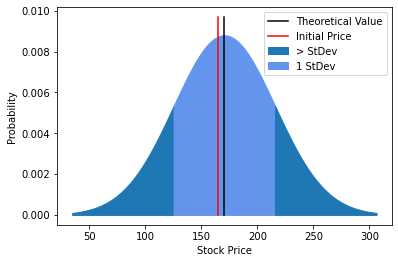

In [77]:
x12 = np.linspace(mean02-3*se02,mean02-1*se02,100)
x22 = np.linspace(mean02-1*se02,mean02+1*se02,100)
x32 = np.linspace(mean02+1*se02,mean02+3*se02,100)

s12 = stats.norm.pdf(x12, mean02, se02) 
s22 = stats.norm.pdf(x22, mean02, se02)
s32 = stats.norm.pdf(x32, mean02, se02)

plt.fill_between(x12, s12, color='tab:blue',label='> StDev') 
plt.fill_between(x22, s22, color='cornflowerblue',label='1 StDev') 
plt.fill_between(x32, s32, color='tab:blue') 

plt.plot([mean02,mean02],[0, max(s22)*1.1], 'k', label='Theoretical Value') #black line plots the theoretical value in future
plt.plot([initial_price,initial_price],[0, max(s22)*1.1], 'r', label='Initial Price') # red line plots the initial price

plt.ylabel("Probability") # show the y- axis label
plt.xlabel("Stock Price") # show the x- axis label
plt.legend() # show the legend
plt.show() #show the plot

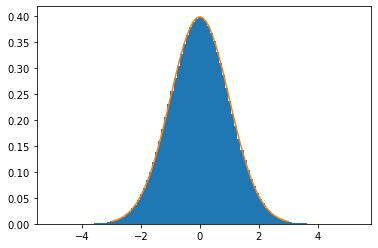

In [80]:
# Another random number, this time using the Marsaglia method. The uniform number is taken from the numpy's default uniformly distributed random number generator.
# This chunk of code is an algorithm that transforms uniformly distributed random number into normally distributed random number. 

import numpy as np
import numpy.random as rd
from scipy import stats
import matplotlib.pyplot as plt

def f(u1, R_sq):
  return u1 * np.sqrt(-2*np.log(R_sq) / R_sq)

def sim(N):
  out = np.zeros(N)
  for i in range(N):
    R_sq = 2
    while R_sq > 1:
      u1 =  rd.uniform(-1,1) # U2[i] 
      u2 =  rd.uniform(-1,1) #U3[i]  
      R_sq = u1**2 + u2**2
    X = f(u1, R_sq)
    out[i] = X
  return out


#plot
N2 = sim(12600000)
plt.figure()
plt.hist(N2, bins=100, density=True)
xx=np.linspace(-3,3,100)
plt.plot(xx,stats.norm.pdf(xx))
Norm2 = N2

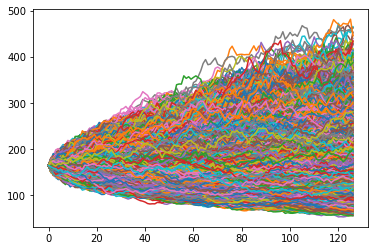

In [81]:
M3 = 100000
N3 = 126
Z3 = np.reshape(Norm2, (N3,M3))
delta_lnSt3 = nudt + volsdt*Z3
lnSt3 = lnS + np.cumsum(delta_lnSt3, axis=0)
lnSt3 = np.concatenate( (np.full(shape=(1, M3), fill_value=lnS), lnSt3 ) )
ST3 = np.exp(lnSt3)
plt.plot(ST3)
plt.show()



170.6053294609676 45.40858524716932
0.8074494794947279 1.156577032220424


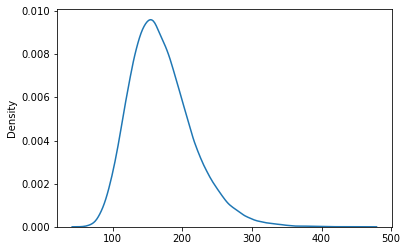

In [82]:
final_day021 = ST3[-1]
sns.kdeplot(final_day021)
mean021 = final_day021.mean()
se021 = final_day021.std()
print(mean021,se021)

skew021 = stats.skew(final_day021)
kurtosis021 = stats.kurtosis(final_day021)
print(skew021, kurtosis021)

In [83]:
print(final_day021.max(), final_day021.min())
x021 =final_day021

m021 = x021.mean() 
s021 = x021.std() 
dof021 = len(x021)-1 
confidence = 0.95

t_crit021 = np.abs(t.ppf((1-confidence)/2,dof021))

(m021-s021*t_crit021/np.sqrt(len(x021)), m021+s021*t_crit021/np.sqrt(len(x021))) 

465.2636149041081 55.66600473694941


(170.32388589883897, 170.88677302309623)

<AxesSubplot:ylabel='Density'>

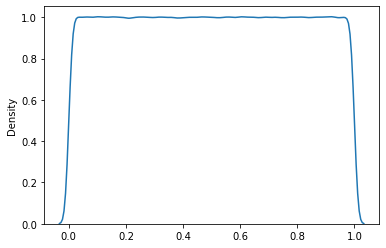

In [84]:
#Now using LCG and inversion method

def LCG(N,S):
  a = 7**5
  M = 2**31-1

  def fn(S):
    return (a*S) % M

  U2 = []

  for k in range(N):
    S = fn(S)
    U2 += [S/M]

  return U2

U2 = LCG(12600000, 123)

sns.kdeplot(U2)

In [85]:
from scipy.special import ndtri

Norm3 = ndtri(U2)

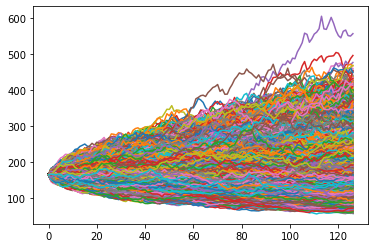

In [87]:
M4 = 100000
N4 = 126
Z4 = np.reshape(Norm3, (N4,M4))
delta_lnSt4 = nudt + volsdt*Z4
lnSt4 = lnS + np.cumsum(delta_lnSt4, axis=0)
lnSt4 = np.concatenate( (np.full(shape=(1, M4), fill_value=lnS), lnSt4 ) )
ST4 = np.exp(lnSt4)
plt.plot(ST4)
plt.show()




170.54409738407097 45.49432556307054
0.8266930577555365 1.259847435259232


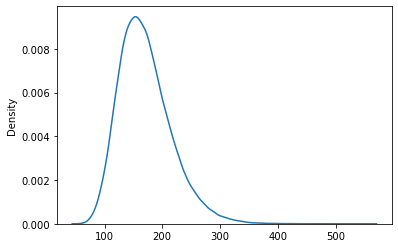

In [88]:
final_day022 = ST4[-1]
sns.kdeplot(final_day022)
mean022 = final_day022.mean()
se022 = final_day022.std()
print(mean022,se022)

skew022 = stats.skew(final_day022)
kurtosis022 = stats.kurtosis(final_day022)
print(skew022, kurtosis022)

In [89]:
print(final_day022.max(), final_day022.min())
x022 =final_day022

m022 = x022.mean() 
s022 = x022.std() 
dof022 = len(x022)-1 
confidence = 0.95

t_crit022 = np.abs(t.ppf((1-confidence)/2,dof022))

(m022-s022*t_crit022/np.sqrt(len(x022)), m022+s022*t_crit022/np.sqrt(len(x022))) 

557.3255931199946 57.562748280671336


(170.2621224012915, 170.82607236685044)

Remaining: Check MSE and Variance of density
find confidence intervals



https://towardsdatascience.com/how-to-calculate-confidence-intervals-in-python-a8625a48e62b for confidence interval

In [ ]:
import statsmodels.api as sm

c2 = final_day1
c1 = np.random.normal(loc = 0 , scale =1 , size = 10000)

dens_c = sm.nonparametric.KDEMultivariateConditional(endog=[c1], exog=[c2], dep_type='c', indep_type='c', bw='normal_reference')
dens_c.bw